In [ ]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [ ]:
import pandas_datareader.data as pdr
from datetime import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [ ]:
start_date = '01-01-2017'
end_date = '01-01-2021'
company = 'MSN'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date,'%d-%m-%Y')
df = pd.read_csv('MSN Historical Data.csv')
data = df.filter(['Price'])
data

,Price
0,74200
1,75500
2,75000
3,75700
4,76700
...,...
743,68486
744,68896
745,68978
746,68732


In [ ]:
#Prepare data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1,1))
len(scaled_data)

748

In [ ]:
#Create x_train, y_train
prediction_days = 60
x_train = []
y_train = []
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape x_train
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(688, 60, 1)

In [ ]:
#Building the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
#Adding the output layer
model.add(Dense(units=1))
#Complining the RNN
model.compile(optimizer ='adam',loss='mean_squared_error')
#Fitting the RNN to the Training test
model.fit(x_train,y_train,epochs = 100,batch_size = 32)
model.save('/content/driver/My Drive/Colab Notebooks/model/stock02.h5')

Epoch 1/100
22/22 [==============================] - 9s 18ms/step - loss: 0.0428
Epoch 2/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0120
Epoch 3/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0095
Epoch 4/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0083
Epoch 5/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0086
Epoch 6/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0075
Epoch 7/100
22/22 [==============================] - 0s 16ms/step - loss: 0.0068
Epoch 8/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0072
Epoch 9/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0071
Epoch 10/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0066
Epoch 11/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0058
Epoch 12/100
22/22 [==============================] - 0s 14ms/step - loss: 0.0062
Epoch 13/100
22/22 [=====

            Date   Price    Open    High     Low     Vol. Change %
0     12/25/2017   74200   73100   75400   73000  207.37K    0.41%
1     12/26/2017   75500   74900   75500   74300  403.71K    1.75%
2     12/27/2017   75000   74900   75700   74800  517.92K   -0.66%
3     12/28/2017   75700   75000   76000   74500  377.03K    0.93%
4     12/29/2017   76700   74800   77000   74800  609.68K    1.32%
...          ...     ...     ...     ...     ...      ...      ...
1000  12/27/2021  139804  141376  144768  139060    8.54M   -1.17%
1001  12/28/2021  141872  140218  144602  138315    9.23M    1.48%
1002  12/29/2021  142286  141872  144023  140218    7.46M    0.29%
1003  12/30/2021  141872  142286  142948  139804    6.11M   -0.29%
1004  12/31/2021  141459  140466  141955  139556    7.85M   -0.29%

[1005 rows x 7 columns]


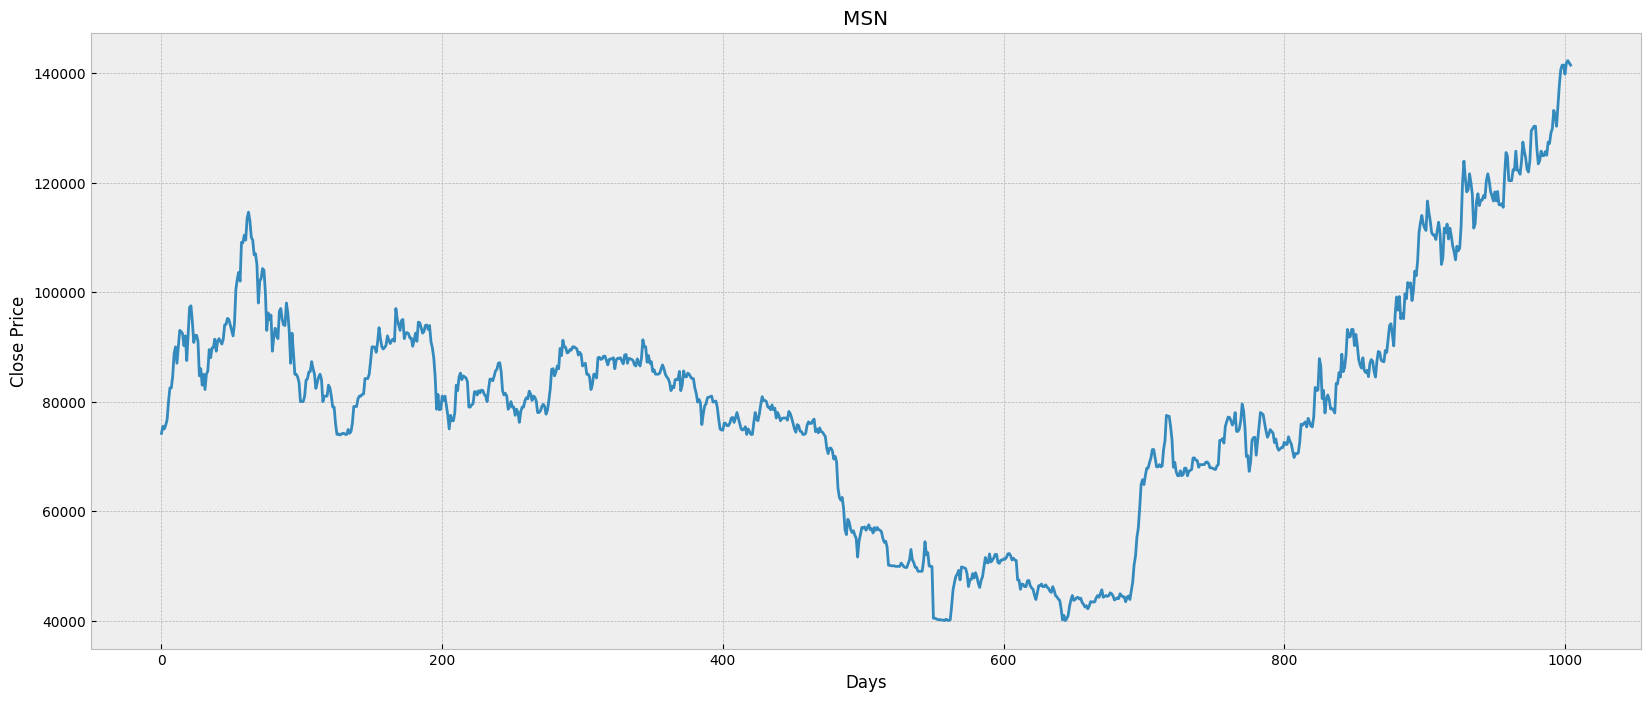

In [ ]:
#Load the test data
start_date = '01-01-2017'
end_date = '01-01-2022'
start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date,'%d-%m-%Y')
test_data = pd.read_csv ('MSN Historical Data (1).csv')
actual_prices = test_data['Price'].values
total_dataset = pd.concat((data['Price'],test_data['Price']),axis=0)
inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
print(test_data)
#Visualize the test data
plt.figure(figsize=(20,8))
plt.title(company)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(test_data['Price'])
plt.show()

In [ ]:
#Prediction on test data
x_test=[]
for x in range(prediction_days, len(inputs)):
  x_test.append(inputs[x-prediction_days:x,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

model=keras.models.load_model('/content/driver/My Drive/Colab Notebooks/model/stock02.h5')
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

32/32 [==============================] - 2s 7ms/step


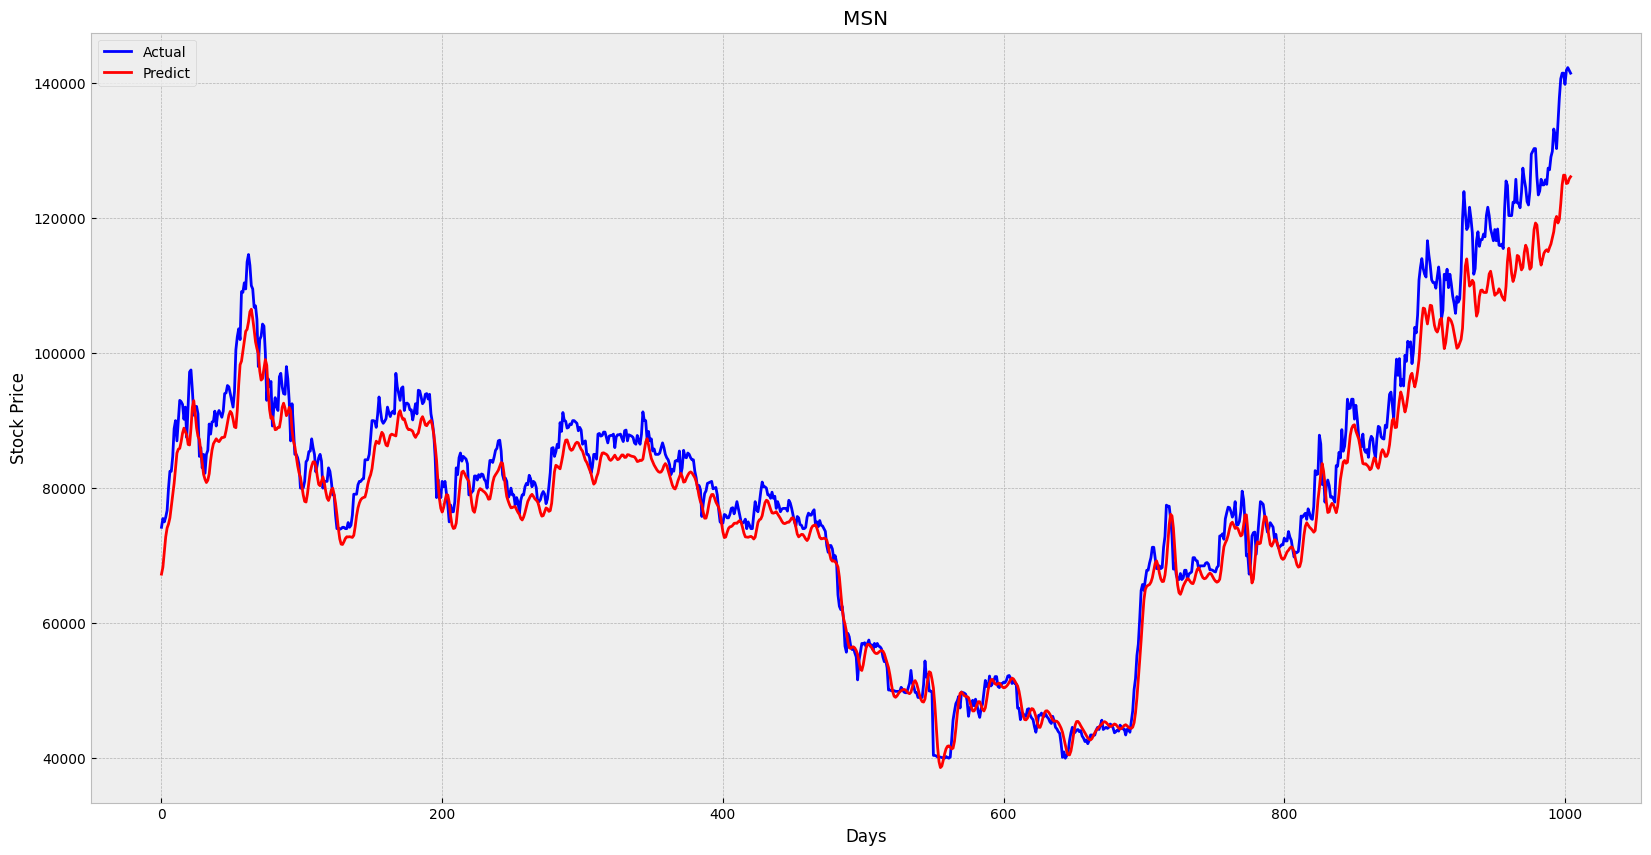

In [ ]:
#Visualize the data
plt.figure(figsize=(20,10))
plt.title(company)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.plot(actual_prices,color="blue")
plt.plot(predicted_prices, color="red")
plt.legend(['Actual','Predict'])
plt.show()